<a href="https://colab.research.google.com/github/cristina-ramos/class_NLP/blob/main/Assignments/perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk import FreqDist
import glob
import string
import random
import pandas as pd
from random import choice
from pandas import DataFrame
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction import DictVectorizer

In [ ]:
!wget 'http://www.cs.cornell.edu/people/pabo/movie-review-data/review_polarity.tar.gz'
!tar -xf review_polarity.tar.gz

> This is the same text pre-processing code from the Log Regression code:

In [ ]:
neg_entries = glob.glob('/content/txt_sentoken/neg/*.txt')
pos_entries = glob.glob('/content/txt_sentoken/pos/*.txt')
print("Total entries in pos folder:", len(pos_entries))
print("Total entries in neg folder:", len(neg_entries))

Total entries in pos folder: 1000
Total entries in neg folder: 1000


In [ ]:
nltk.download('stopwords')
stops = set(stopwords.words('english'))

In [ ]:
#combining both folders into one list:
total_entries = []

def merge_entry(directory):
  for fn in directory:
    if fn in neg_entries:
      with open(fn) as f:
        message = f.read().split()
        for w in message:
          if w not in string.punctuation:
            total_entries.append(w)
    elif fn in pos_entries:
      with open(fn) as f:
        message = f.read().split()
        for w in message:
          if w not in string.punctuation:
            total_entries.append(w)

merge_entry(pos_entries)
merge_entry(neg_entries)
print("The total number of words in the merged entries is:", len(total_entries))

The total number of words in the merged entries is: 1294462


In [ ]:
#Removing stop words
total_words = [w for w in total_entries if w not in stops]
print("The total number of words is:", len(total_words))

The total number of words is: 705486


In [ ]:
#getting the top 100 words as our feature list:
fdist = FreqDist(total_words)
vocab = fdist.most_common(1000)

#adding features:
total_texts = pos_entries + neg_entries
texts = []
for fn in total_texts:
  if fn in pos_entries:
    cat = 1
  else:
    cat = 0
  with open(fn) as f:
    message = f.read().split()
    message = [w.rstrip(string.punctuation) for w in message]
    message = [w.lower() for w in message]
    message = [i for i in message if i]
    message = [word for word in message if word not in stops]
    texts.append((message, cat))
len(texts)

2000

In [ ]:
#assigning features to the pos and neg labels:
def get_features(document):
  feature = dict()
  for key, value in vocab:
    if key in document:
      feature[key] = 1
    else:
      feature[key] = 0
  return feature
doc_features = [(get_features(message), cat) for (message, cat) in texts]
len(doc_features)

2000

In [ ]:
#splitting the data into testing and training:
traindata, testdata = train_test_split(doc_features, test_size=0.2, random_state=1)

train = pd.DataFrame(traindata, columns=['Features', 'Labels'])
test = pd.DataFrame(testdata, columns=['Features', 'Labels'])

train_feats = train['Features']
test_feats = test['Features']

train_labels = train['Labels']
test_labels = test['Labels']

In [ ]:
vector = DictVectorizer(sparse = False)
x_train = vector.fit_transform(train_feats.values)
x_test = vector.transform(test_feats)

y_train = train_labels.values
y_test = test_labels.values
len(y_test)

400

In [ ]:
print(len(x_train))
print(len(y_train))

1600
1600


> Perceptron:

In [ ]:
class perceptron:

    def __init__(self, learn_rate=0.01, iters=100):
      self.lr = learn_rate
      self.iters = iters
      self.weights = []
      self.activation = self.activation

    def activation(self, x):
      return np.where(x >= 0, 1, 0)

    def predict(self, X):
      lin_out = np.dot(X, self.weights) + self.bias
      y_predict = self.activation(lin_out)
      return y_predict

    #initializing weights and bias
    def fit(self, X, y):
      n_samples, n_feats = X.shape
      self.weights = np.zeros(n_feats)
      self.bias = 0
      y_i = np.array([1 if i > 0 else 0 for i in y])
      #computing activation based on the algorithim
      for i in range(self.iters):
        for index, x_i in enumerate(X):
          lin_out = np.dot(x_i, self.weights) + self.bias
          y_predicted = self.activation(lin_out)
          #updating weights and bias
          update = self.lr * (y_i[index] - y_predicted)
          self.weights += update * x_i
          self.bias += update
    
    #loss function 
    def loss_plt(self, X, Y):
      w = self.weights
      lr = self.lr
      n = self.iters
      errors = []
      for i in range(n):
        total_error = 0
        for i, x in enumerate(X):
          if (np.dot(X[i], w) * Y[i]) <= 0:
            total_error += (np.dot(X[i], w) * Y[i])
            w = w + lr * X[i] * Y[i]
        errors.append(total_error*-1)
      plt.plot(errors)
      plt.xlabel('Iterations')
      plt.ylabel('Total Loss')
      return w

In [ ]:
#testing the system and calculating the accuracy, precision, recall, etc. 
p = perceptron(learn_rate=.01, iters=100)
p.fit(x_train, y_train)
y_pred = p.predict(x_test)
scores = classification_report(y_test, y_pred, labels=None)
print(scores)

              precision    recall  f1-score   support

           0       0.79      0.80      0.79       205
           1       0.78      0.78      0.78       195

    accuracy                           0.79       400
   macro avg       0.79      0.79      0.79       400
weighted avg       0.79      0.79      0.79       400



[ 0.00000000e+00 -6.00000000e-02 -1.90000000e-01 -1.30000000e-01
 -1.30000000e-01  5.00000000e-02  1.60000000e-01  4.00000000e-02
 -2.00000000e-02 -4.00000000e-02 -1.10000000e-01 -1.10000000e-01
  1.00000000e-01  1.00000000e-01 -4.00000000e-02  2.00000000e-02
 -8.00000000e-02 -5.00000000e-02  1.20000000e-01 -1.20000000e-01
 -2.00000000e-01 -3.00000000e-02  1.10000000e-01  1.20000000e-01
  2.00000000e-02 -1.00000000e-02 -1.00000000e-01 -1.00000000e-02
  8.00000000e-02 -3.00000000e-02  1.30000000e-01  9.00000000e-02
  1.60000000e-01 -1.00000000e-02  8.00000000e-02  1.80000000e-01
  8.00000000e-02  6.00000000e-02 -3.00000000e-02 -1.00000000e-02
  1.80000000e-01 -2.70000000e-01  6.00000000e-02 -1.00000000e-01
  9.00000000e-02 -1.30000000e-01 -1.70000000e-01  5.00000000e-02
 -4.00000000e-02 -7.00000000e-02  1.00000000e-02 -4.00000000e-02
 -1.40000000e-01 -6.00000000e-02  3.00000000e-02  7.00000000e-02
  3.46944695e-18  7.00000000e-02 -1.20000000e-01 -1.80000000e-01
  2.00000000e-01 -9.00000

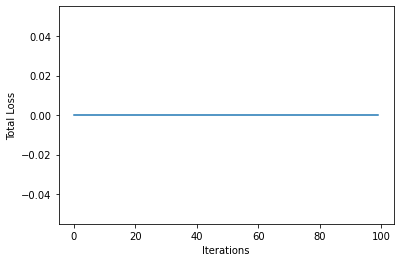

In [ ]:
#getting the avg loss for the training documents....I don't think this is right especially the plot, I don't think it's meant to be like that.
plot_train = print(p.loss_plt(x_train, y_train))

[ 0.00000000e+00 -5.00000000e-02 -1.80000000e-01 -1.20000000e-01
 -1.30000000e-01  5.00000000e-02  1.70000000e-01  5.00000000e-02
 -2.00000000e-02 -4.00000000e-02 -8.00000000e-02 -9.00000000e-02
  1.10000000e-01  1.20000000e-01 -4.00000000e-02  2.00000000e-02
 -7.00000000e-02 -4.00000000e-02  1.20000000e-01 -1.10000000e-01
 -2.00000000e-01 -3.00000000e-02  1.10000000e-01  1.20000000e-01
  2.00000000e-02  1.00000000e-02 -8.00000000e-02  3.46944695e-18
  9.00000000e-02 -1.00000000e-02  1.50000000e-01  1.10000000e-01
  1.70000000e-01 -3.46944695e-18  8.00000000e-02  1.90000000e-01
  1.00000000e-01  6.00000000e-02 -1.00000000e-02 -1.00000000e-02
  1.80000000e-01 -2.50000000e-01  9.00000000e-02 -7.00000000e-02
  1.10000000e-01 -1.30000000e-01 -1.70000000e-01  5.00000000e-02
 -4.00000000e-02 -7.00000000e-02  2.00000000e-02 -4.00000000e-02
 -1.20000000e-01 -6.00000000e-02  3.00000000e-02  7.00000000e-02
  1.00000000e-02  7.00000000e-02 -1.20000000e-01 -1.60000000e-01
  2.00000000e-01 -5.00000

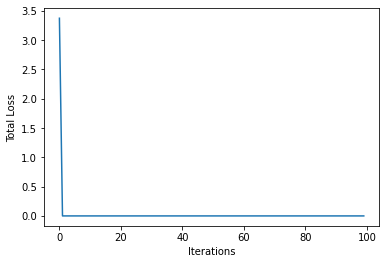

In [ ]:
#doing the same loss function for the testing sets now:
plot_test = print(p.loss_plt(x_test, y_test))